In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy
import numpy as np

$\frac{ug}{l} * s = \frac{ugs}{l}$

$ug / (ugs/l) = l/s$

Groups B & C used:

In [2]:
solution = 0.1 # g/l
solution_ug = solution * 10**6 # ug/l
solution_ug_ml_b_c = solution_ug / 10**3 # ug/ml
solution_ug_ml_b_c

100.0

Groups A & D

In [3]:
solution = 2 / 5 # g/l * 20% rodamine
solution_ug = solution * 10**6 # ug/l
solution_ug_ml_a_d = solution_ug / 10**3 # ug/ml
solution_ug_ml_a_d

400.0

In [4]:
solution_dict = {"A": solution_ug_ml_a_d,
                 "B": solution_ug_ml_b_c,
                 "C": solution_ug_ml_b_c,
                 "D": solution_ug_ml_a_d}

In [5]:
def plot(fname, group):
    df = pd.read_csv(fname,delimiter="\t",skiprows=1,index_col=0, parse_dates=True)
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    zero = df['Rhodamine (ug/L)'].iloc[:2].mean()
    df['Rhodamine (ug/L)']  = df['Rhodamine (ug/L)'] - zero
    df[['Rhodamine (ug/L)']].plot(ax=ax[0])
    df[['Temp (C)']].plot(ax=ax[1],color="C3",ls="--")

    title = fname[:fname.find(".tab")]
    
    ax[0].set_ylabel('Rhodamine (ug/L)')
    
    ax[1].set_ylabel('Temp (C)')
    
    area = scipy.integrate.simpson(df['Rhodamine (ug/L)'].to_numpy(),dx=2)
    
    try:
        with open(fname) as fin:
            for i, row in enumerate(fin):
                if i == 0:
                    val = row[row.find("-")+2:].strip()[:-2]
                    ml_added = int(val)
    except Exception as e:
        ml_added = int(input("What was the input ml (int)"))
    
    solution_ug_ml = solution_dict[group]
    ug_added = solution_ug_ml * ml_added 
    discharge = ug_added/area 
    
    ax[0].set_title(title + f'\n - Q:{discharge:.2f} l/s with {ml_added}ml')
    return df, fig, val

# A: 

In [6]:
filesA = glob.glob("Group A\*.tab")
filesA

['Group A\\Location1.tab',
 'Group A\\Location10.tab',
 'Group A\\Location10_2.tab',
 'Group A\\Location6.tab']

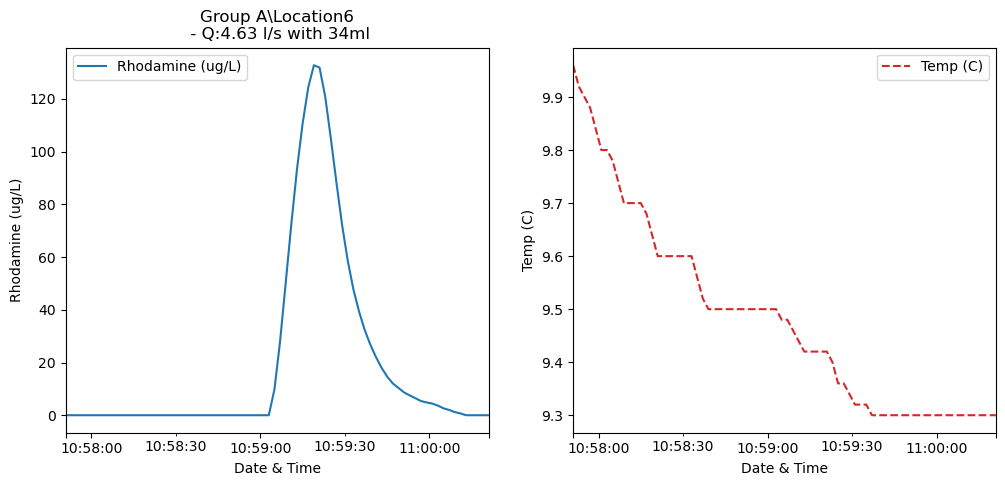

In [7]:
_, _, _ = plot(filesA[3], "A")

# B: 

In [8]:
filesB = glob.glob("Group B\*.tab")
filesB

['Group B\\12.5.tab',
 'Group B\\12.6.tab',
 'Group B\\14.5.second.tab',
 'Group B\\log14.5.tab',
 'Group B\\log14.6.second.tab',
 'Group B\\log14.6.tab',
 'Group B\\log3.5.second.tab',
 'Group B\\log3.5.tab',
 'Group B\\log3.5.third.tab',
 'Group B\\log3.6.second.tab',
 'Group B\\log3.6.tab',
 'Group B\\log3.6.third.tab',
 'Group B\\log4.5.tab',
 'Group B\\log4.6.tab']

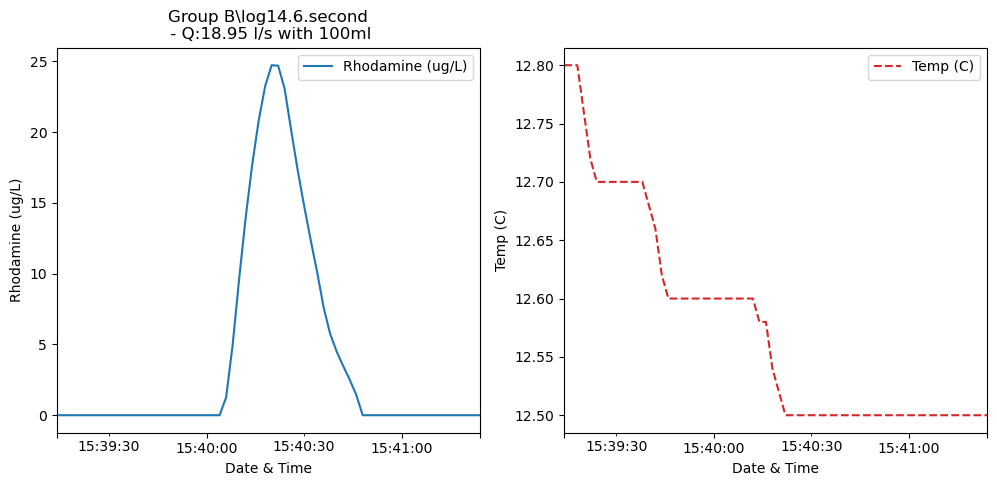

In [35]:
_, _, _ = plot(filesB[4], "B")

# C:

In [10]:
filesC = glob.glob("Group C\*.tab")
filesC

['Group C\\C - loc1.tab',
 'Group C\\C - loc1b.tab',
 'Group C\\C - loc2.tab',
 'Group C\\C - loc2b.tab']

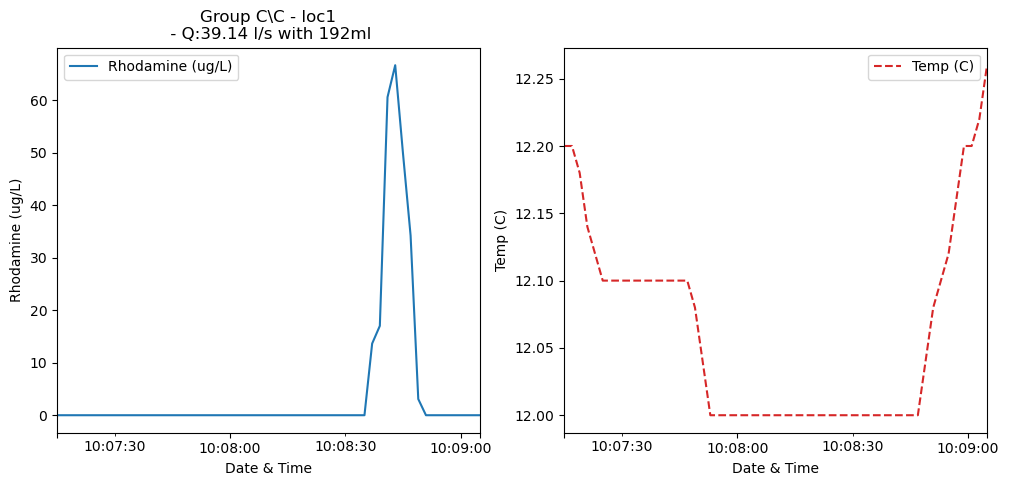

In [39]:
_, _, _ = plot(filesC[0], "C")

# D: 

In [12]:
filesD = glob.glob("Group D\*.tab")

In [31]:
filesD

['Group D\\1_1st_try.tab',
 'Group D\\1_2nd_try.tab',
 'Group D\\Location_2.tab',
 'Group D\\Location_3.tab']

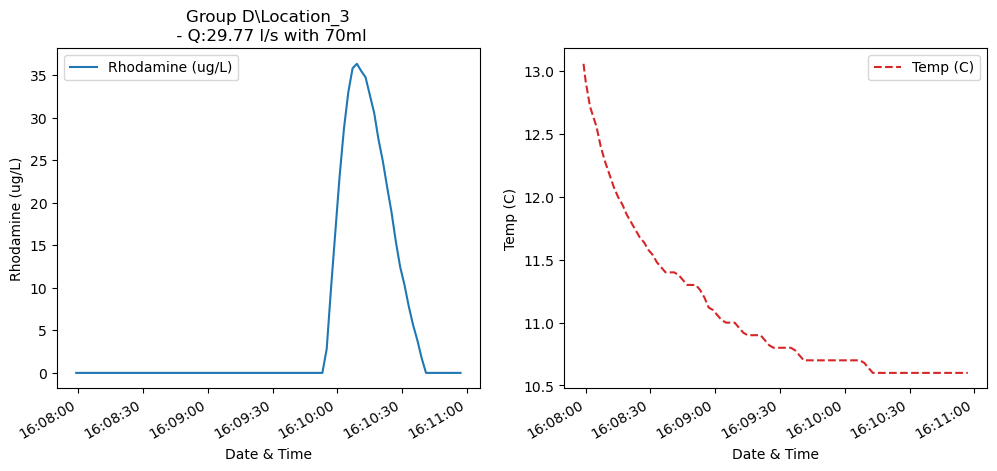

In [38]:
_, _, _ = plot(filesD[3], "D")

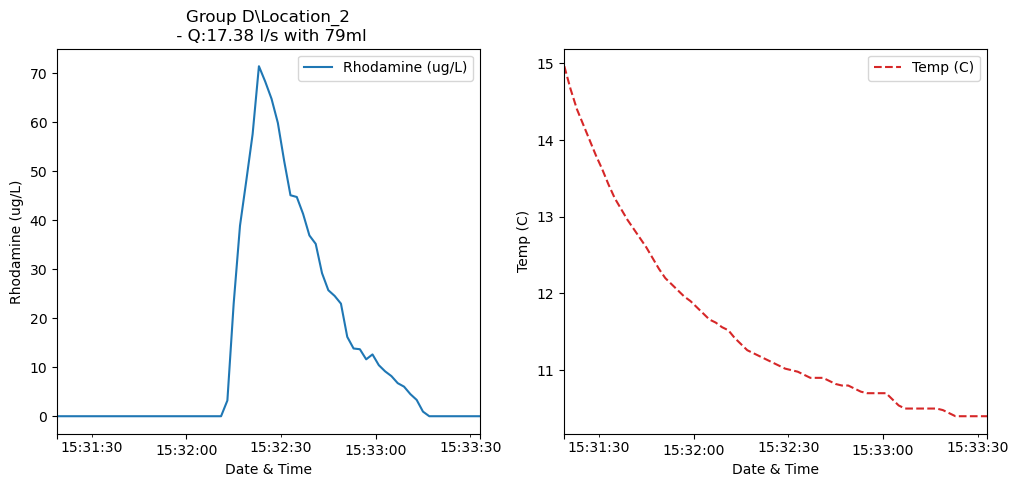

In [36]:
df2, fig2, val2 = plot(filesD[2], "D")

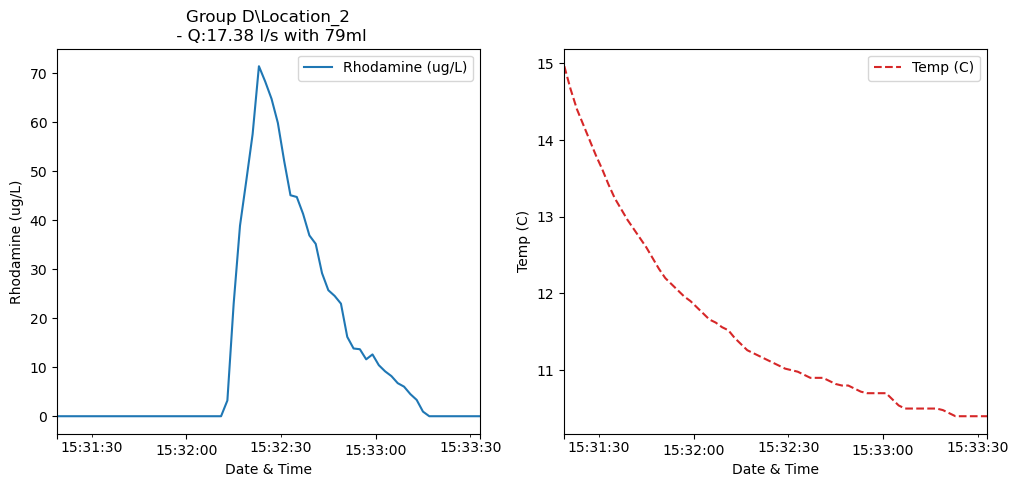

In [15]:
df2, fig2, val2 = plot(filesD[2], "D")

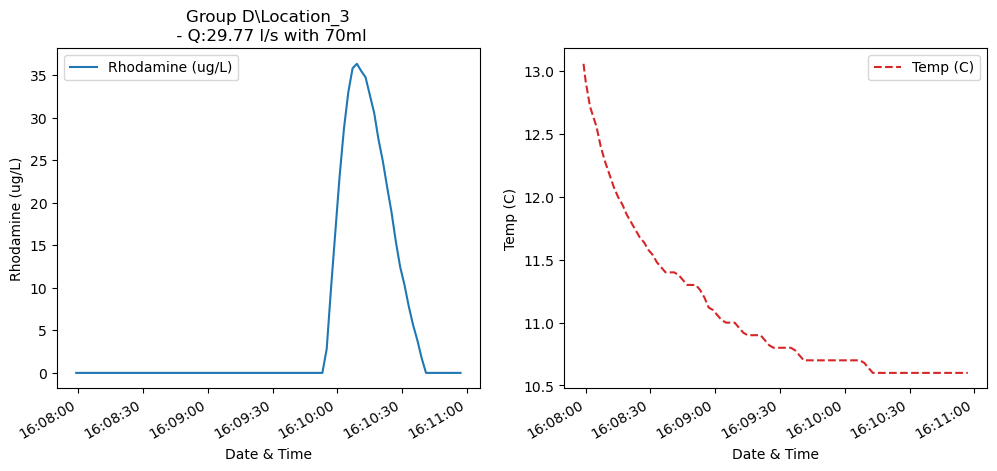

In [16]:
df2, fig2, val2 = plot(filesD[3], "D")